# SDA - Data Science Bootcamp 2022


# Limitless Capstone Project

Mashael Alshaikhi -
Wajd Alosaimi -
Abdulrahman Bahader -
Lamees Alotaibi -
Raoom Alsaab 

# ---------------------------------------------------------------------------------------------------------


In [1]:
# Importing the used library and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBClassifier
plt.style.use("ggplot")


In [3]:
# Load dataset ( The Used Cars in Saudi Arabia)
Used_Cars = pd.read_csv('/Users/lameesotb/Desktop/Capstone Project/UsedCarsSA_Unclean_EN.csv')
Used_Cars.head()

,Link,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price,Negotiable
0,https://syarah.com/%D9%83%D8%B1%D8%A7%D9%8A%D8...,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,Used,103000,Riyadh,114000,False
1,https://syarah.com/%D9%86%D9%8A%D8%B3%D8%A7%D9...,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,Used,5448,Riyadh,Negotiable,True
2,https://syarah.com/online/%D9%86%D9%8A%D8%B3%D...,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,Used,72418,Riyadh,27500,False
3,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,Used,114154,Riyadh,43000,False
4,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,Used,41912,Riyadh,59500,False


# Variables Describtion
________________________________________________________________________________________________________

- Make: Name of the car company
- Model: Name of a car product
- Year : Year of Manufacturing
- Origin: Country of importer (Gulf / Saudi / Other)
- Color: Color of the used car
- Options: Full Options / Semi-Full / Standard
- Engine_Size: The engine size of used car
- Fuel_Model: Fuel Model size of used car (Diesel / Gas / Hybrid)
- Gear_Type: Automatic / Manual
- Mileage: The average distance that a vehicle can travel on (in km)
- Region: The region in which the used car was offered for sale
- Price: Price of the used car (in SAR)
- Negotiable: If True, the price is 0. This means the price is negotiable (not set)


# The Project Objectives
________________________________________________________________________________________________________

- Building a regression model to predict the price of used cars in Saudi Arabia based on the given data.
- Building a classification model to predict the options of used cars in Saudi Arabia based on the given data.
- Understanding which variables are significant in predicting the price and options of the used cars.
- Comparing different ML models, and find the best one among them.

# ---------------------------------------------------------------------------------------------------------


# 1. Exploratory Data Analysis (EDA)


In [4]:
# To check the number of rows and cols in the dataset
print('Shape:', Used_Cars.shape)

Shape: (8248, 15)


In [5]:
# To check the dataset information for each variable
Used_Cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8248 entries, 0 to 8247
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Link         8248 non-null   object 
 1   Make         8248 non-null   object 
 2   Type         8248 non-null   object 
 3   Year         8248 non-null   int64  
 4   Origin       8153 non-null   object 
 5   Color        8248 non-null   object 
 6   Options      8139 non-null   object 
 7   Engine_Size  5982 non-null   float64
 8   Fuel_Type    8248 non-null   object 
 9   Gear_Type    8174 non-null   object 
 10  Condition    8248 non-null   object 
 11  Mileage      8248 non-null   int64  
 12  Region       8248 non-null   object 
 13  Price        8248 non-null   object 
 14  Negotiable   8248 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(11)
memory usage: 910.3+ KB


In [6]:
# Checking the duplicated rows
print("Checking the duplicated rows: ")
print("Number of duplicate rows: ", sum(Used_Cars.duplicated()))

print("_________________________________________________________________")

# Dropping the duplicated rows
Used_Cars.drop_duplicates(inplace=True)
print("After dropping the duplicated rows: ")
print("Number of duplicate rows: ", sum(Used_Cars.duplicated()))

Checking the duplicated rows: 
Number of duplicate rows:  20
_________________________________________________________________
After dropping the duplicated rows: 
Number of duplicate rows:  0


In [7]:
# Renaming unclear columns:
# "Type" column is confusing to read, So, we will change it to "Car_Model" to improves the readability of the dataset.
Used_Cars = Used_Cars.rename(columns={"Type": "Car_Model"})

In [8]:
# Checking and dropping the irrelevant columns (Condition)
Used_Cars.value_counts('Condition')

Condition
Used    8228
dtype: int64

In [9]:
# Clean the dataset through deleting the unneeded columns (Link,Condition,Negotiable).
Used_Cars = Used_Cars.drop(['Link','Condition','Negotiable'], axis=1)

In [10]:
# Summary statistics for numerical attrubires 
Used_Cars.describe()

,Year,Engine_Size,Mileage
count,8228.000000,5965.000000,8.228000e+03
mean,2014.012275,3.176932,1.496074e+05
std,5.933833,1.568393,3.459146e+05
min,1936.000000,1.000000,1.000000e+02
25%,2012.000000,2.000000,3.700000e+04
50%,2016.000000,2.700000,1.020000e+05
75%,2018.000000,4.000000,1.960000e+05
max,2022.000000,9.000000,2.000000e+07


### Notice:
- Mileage has maximum value of 20,000,000. This is not possible! 
- Price column, where is it, it should be as numeric variable.

In [11]:
# To be realistic; most of the used cars with more than 900000 mileage will not be sold.
# Therefore, the dataset is limited to be in this limit
Used_Cars = Used_Cars[Used_Cars['Mileage'] < 900000] 

In [12]:
# Summary statistics for categorical variables
Used_Cars.describe(exclude="number")

,Make,Car_Model,Origin,Color,Options,Fuel_Type,Gear_Type,Region,Price
count,8178,8178,8083,8178,8069,8178,8104,8178,8178
unique,65,434,3,15,3,3,2,27,548
top,Toyota,Land Cruiser,Saudi,White,Full,Gas,Automatic,Riyadh,Negotiable
freq,2052,370,6034,3544,3215,7982,7013,3281,2568


### Notice:
- Toyota Land Cruiser is the most selling car.
- White is the most preferable color.
- Full option is the most selected. 
- Riyadh is the most popular city.
- Price needs to handling as the top is 'Negotiable' which means the price is not set.

## 1.1 Handling Missing Values 

In [13]:
# Finding the missing values 
Used_Cars.isna().sum()

Make              0
Car_Model         0
Year              0
Origin           95
Color             0
Options         109
Engine_Size    2241
Fuel_Type         0
Gear_Type        74
Mileage           0
Region            0
Price             0
dtype: int64

In [14]:
# Fill in the Engine_Size with the mean 
Mean_value= Used_Cars['Engine_Size'].mean()
Used_Cars['Engine_Size'].fillna(value=Mean_value, inplace=True)

In [15]:
# Drop the nall values
Used_Cars.dropna(inplace=True)
Used_Cars.isna().sum()

Make           0
Car_Model      0
Year           0
Origin         0
Color          0
Options        0
Engine_Size    0
Fuel_Type      0
Gear_Type      0
Mileage        0
Region         0
Price          0
dtype: int64

## 1.2 Handling The Price Column 

In [16]:
# Converting 'Price' from object to numeric
Used_Cars['Price'] = Used_Cars['Price'].apply(pd.to_numeric, errors='coerce')
# Also, we need to converte 'Engine_Size' from float to int
Used_Cars['Engine_Size'] = Used_Cars['Engine_Size'].astype(int)

In [17]:
# Displaying the dataset types
display(Used_Cars.dtypes)

Make            object
Car_Model       object
Year             int64
Origin          object
Color           object
Options         object
Engine_Size      int64
Fuel_Type       object
Gear_Type       object
Mileage          int64
Region          object
Price          float64
dtype: object

In [17]:
# Discovering that there are nall values after converting 'Price' to numeric
Used_Cars.isna().sum()

Make              0
Car_Model         0
Year              0
Origin            0
Color             0
Options           0
Engine_Size       0
Fuel_Type         0
Gear_Type         0
Mileage           0
Region            0
Price          2488
dtype: int64

In [18]:
# Before dropping the null values, we decide to determine a range of the price first
Used_Cars = Used_Cars[Used_Cars['Price'] > 4000]
# Then testing whether there will be null values or not, and the result:(the dataset is clean now)
Used_Cars.isna().sum()

Make           0
Car_Model      0
Year           0
Origin         0
Color          0
Options        0
Engine_Size    0
Fuel_Type      0
Gear_Type      0
Mileage        0
Region         0
Price          0
dtype: int64

In [19]:
Used_Cars.shape

(5469, 12)

# ---------------------------------------------------------------------------------------------------------


# 2. Dataset Features Visualization

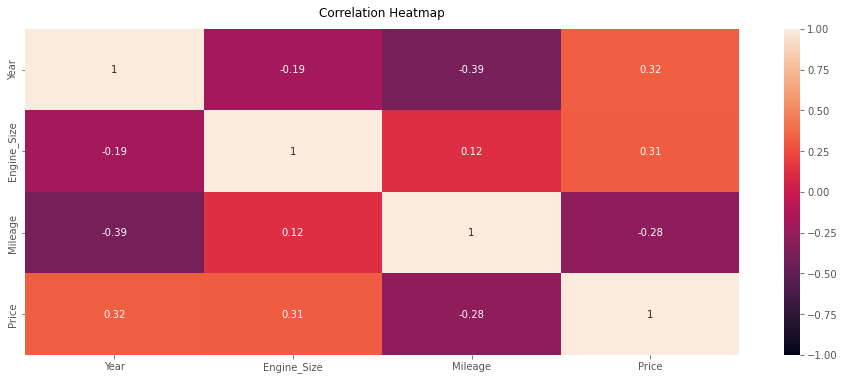

In [34]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(Used_Cars.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## 2.1 Insight 1

The heatmap correlation polt we did it to understand the relationship between multiple variables and attributes
in the dataset.

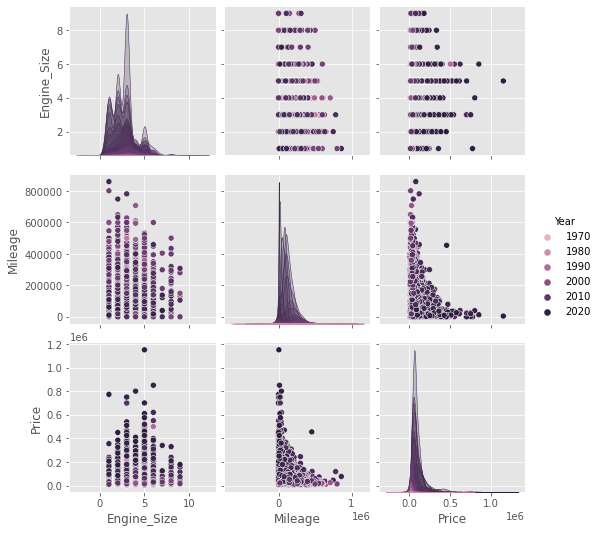

In [22]:
sns.pairplot(Used_Cars, hue='Year')

## 2.2 Insight 2

This pairplot shows us the relationships between many variables wiche are : price , mileage , engine_size and year.

- The price in year 2020 is higher than the others years.

- The Engine size which is 5.0 containes the highest price.

- The relationship between the Mileage and the price is an inverse relationship, the higher the mileage, the lower the price.

Text(0, 0.5, 'Count of cars')

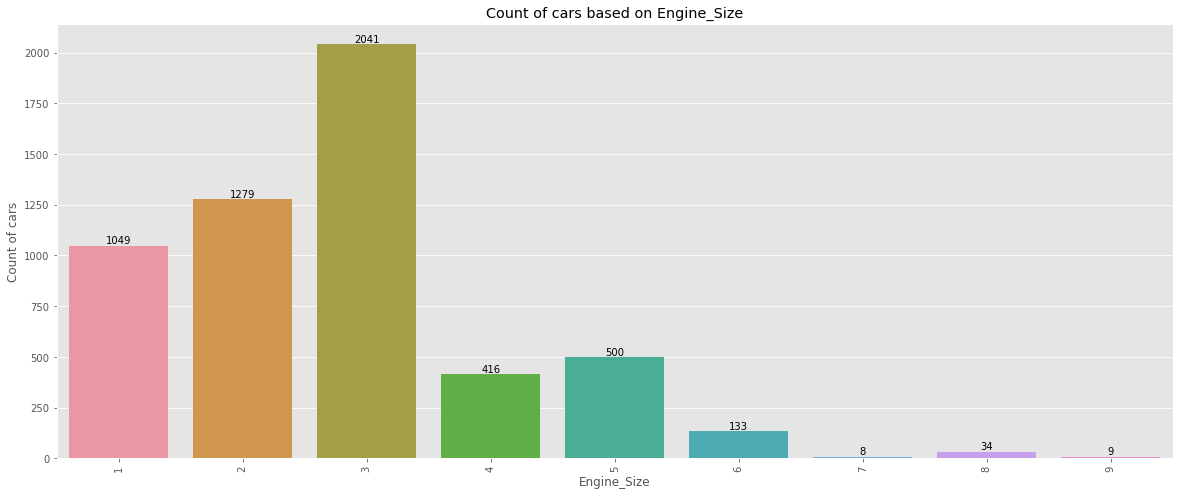

In [23]:
plt.figure(figsize = (20, 8))
plot = sns.countplot(x = 'Engine_Size', data = Used_Cars)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on Engine_Size")
plt.xlabel("Engine_Size")
plt.ylabel("Count of cars")

## 2.3 Insight 3

This bar chart show us the relationship between the engine size and how many cars for each engine size.

- We see that the engine size whic is 2 has the highset amount of cars which are 1191 cars while the engine size whice are 7 & 9 that containes the less amount of cars whice are saven cars.

Text(0, 0.5, 'Count of Cars')

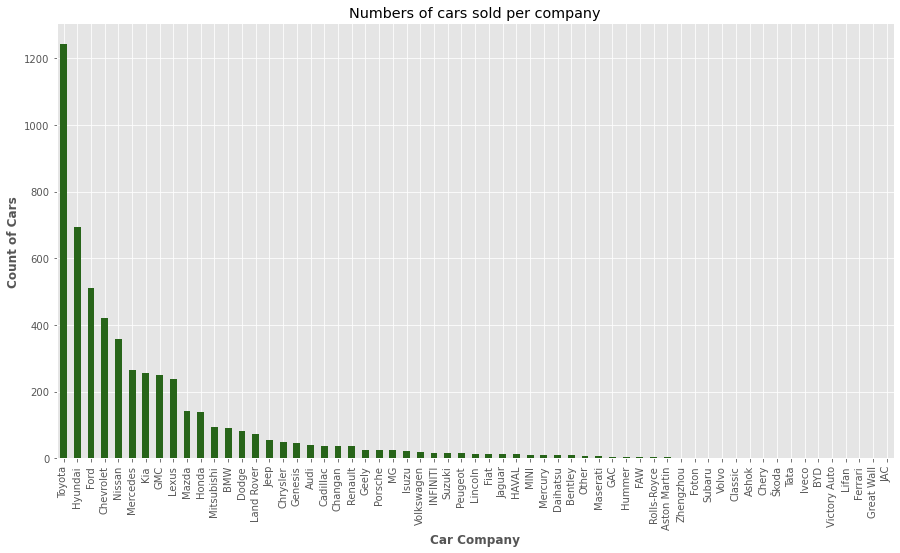

In [35]:
plt.rcParams['figure.figsize'] = [15,8]
ax = Used_Cars['Make'].value_counts().plot(kind='bar', colormap = 'PiYG_r')
ax.title.set_text('Numbers of cars sold per company')
plt.xlabel("Car Company",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')

## 2.4 Insight 4

This bar chart shows all the company names and how many cars sold for each company.

- Toyota company has the highset number of cars that are sold in Saudi Arabia and then Hyundai.

Text(0, 0.5, 'Count of Cars')

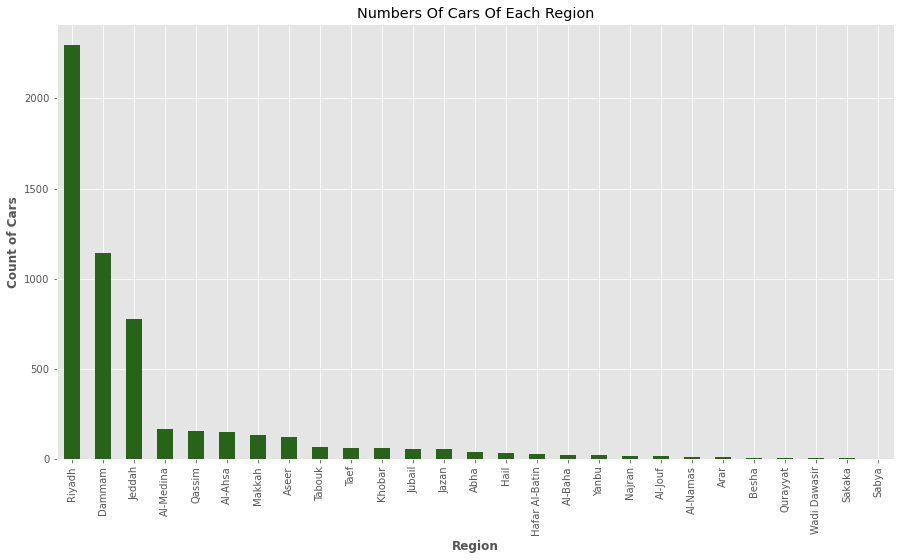

In [25]:
plt.rcParams['figure.figsize'] = [15,8]
ax = Used_Cars['Region'].value_counts().plot(kind='bar', colormap = 'PiYG_r')
ax.title.set_text('Numbers Of Cars Of Each Region')
plt.xlabel("Region",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')

## 2.5 Insight 5

This bar chart shows how many cars are sold for each region in Saudi Arabia.

- The Riyadh region is the highest selling area for cars in the Saudi Arabia and then Dammam.

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


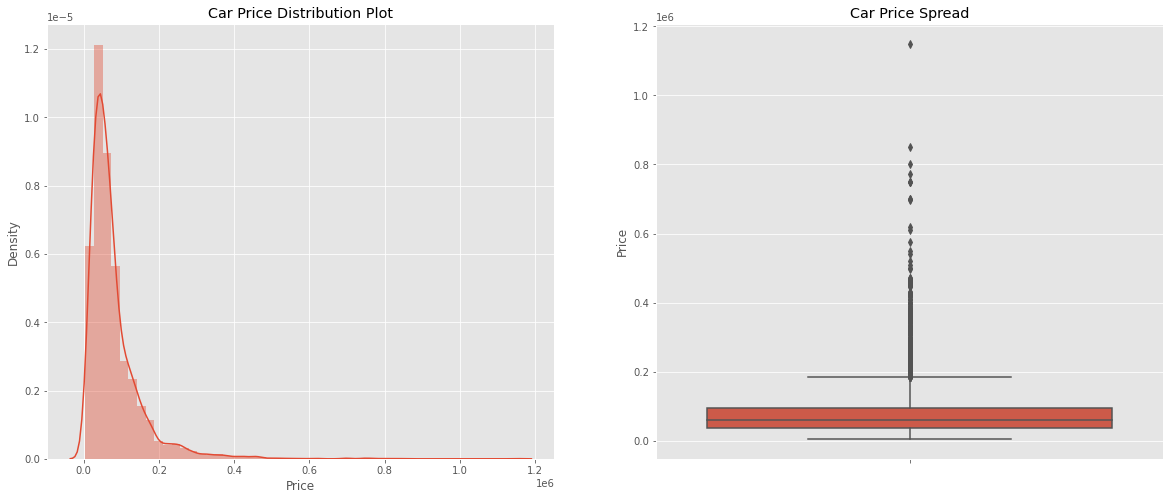

In [36]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(Used_Cars.Price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=Used_Cars.Price)

plt.show()

## 2.6 Insight 6

This plot shows the cars price distrbuition whice the cars priced between 200000 and less are the most sold in Saudi Arabia.

In [27]:
print(Used_Cars.Price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    5.469000e+03
mean     7.963943e+04
std      7.475712e+04
min      4.500000e+03
25%      3.600000e+04
50%      5.860000e+04
75%      9.500000e+04
85%      1.290000e+05
90%      1.550000e+05
100%     1.150000e+06
max      1.150000e+06
Name: Price, dtype: float64


The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000). There is a significant difference between the mean and the median of the price distribution. The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)

Text(0, 0.5, 'Count of cars')

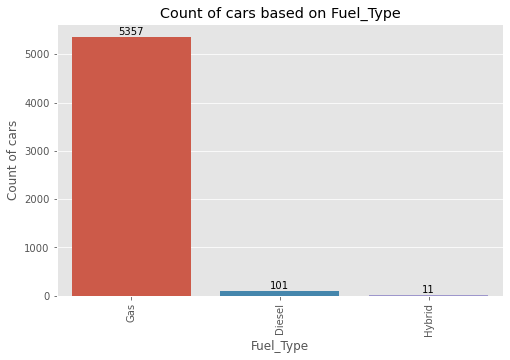

In [28]:
plt.figure(figsize = (8, 5))
plot = sns.countplot(x = 'Fuel_Type', data = Used_Cars)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on Fuel_Type")
plt.xlabel("Fuel_Type")
plt.ylabel("Count of cars")

## 2.7 Insight 7

This bar chart shows the count of cars based on fuel Model.

- There are three Models of fuel which are Gas , Diesel and Hybrid.

- The Gas Model contains the highest amount of cars and it has 4068 cars.

Text(0, 0.5, 'Count of Options')

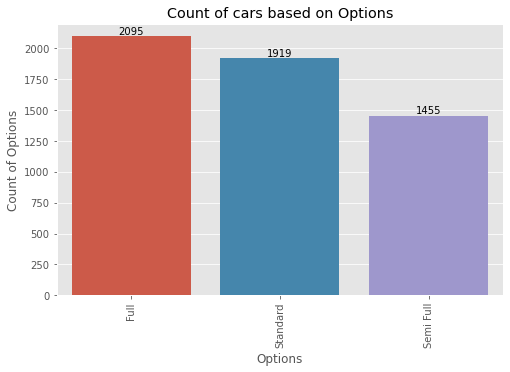

In [29]:
plt.figure(figsize = (8, 5))
plot = sns.countplot(x = 'Options', data = Used_Cars)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on Options")
plt.xlabel("Options")
plt.ylabel("Count of Options")

## 2.8 Insight 8

This bar chart shows the count of cars based on options.

- There are three Models of options which are Full , Standard and Semi Full.

- The Standard option has the highest amount of cars while the Semi Full is less.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


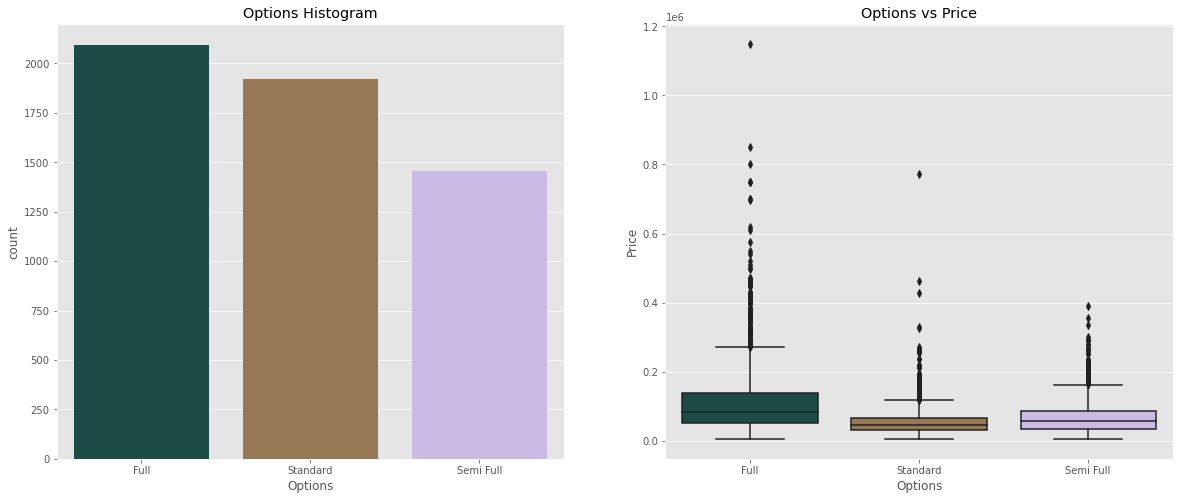

In [30]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Options Histogram')
sns.countplot(Used_Cars.Options, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Options vs Price')
sns.boxplot(x=Used_Cars.Options, y=Used_Cars.Price, palette=("cubehelix"))

plt.show()

## 2.9 Insight 9

This boxplot shows the price for each options (Full , Standard , Semi Full).

- The Full Model is more expensive than the others Models.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


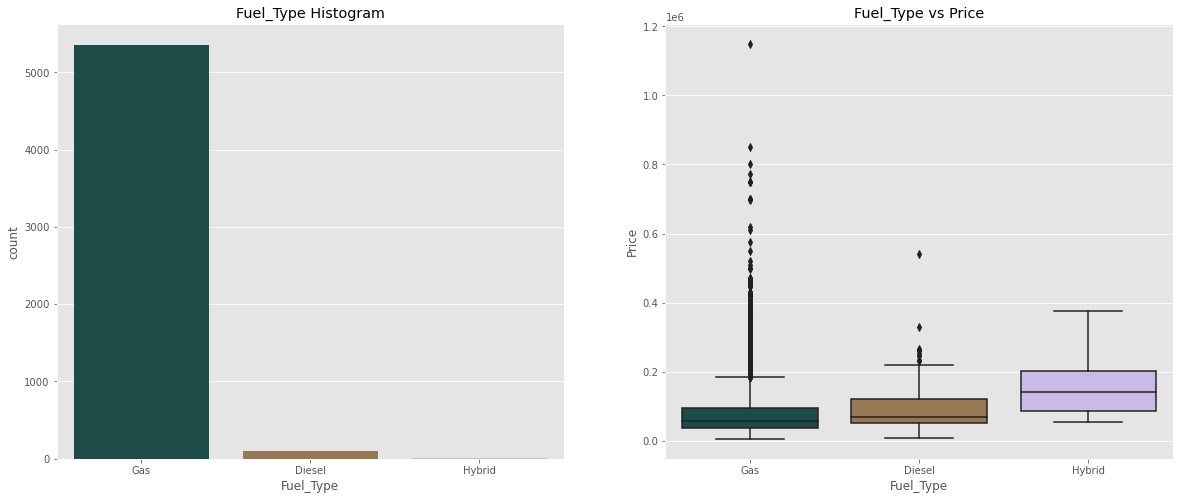

In [31]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Fuel_Type Histogram')
sns.countplot(Used_Cars.Fuel_Type, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Fuel_Type vs Price')
sns.boxplot(x=Used_Cars.Fuel_Type, y=Used_Cars.Price, palette=("cubehelix"))

plt.show()

## 2.10 Insight 10

This boxplot shows the price for each Fuel Model (Gas, Diesel , Hybrid).

- The Gas Model is more expensive than the others Models.

[Text(0.5, 0, 'Colors'), Text(0, 0.5, 'Frequency of company')]

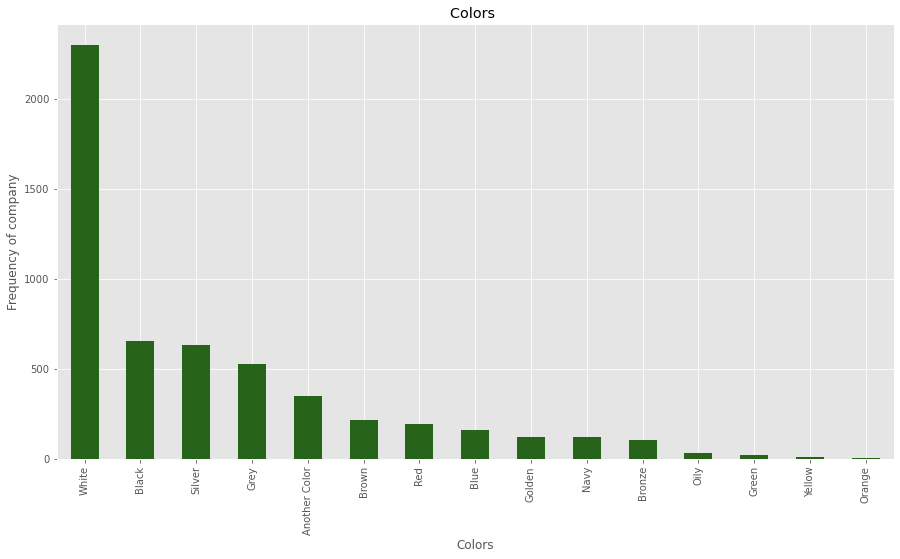

In [37]:
plt1 = Used_Cars.Color.value_counts().plot(kind='bar',colormap = 'PiYG_r')
plt.title('Colors ')
plt1.set(xlabel = 'Colors', ylabel='Frequency of company')


## 2.11 Insight 11

This bar chart shows diffrent colors and the frequency of colors.

- White is the most sold color.

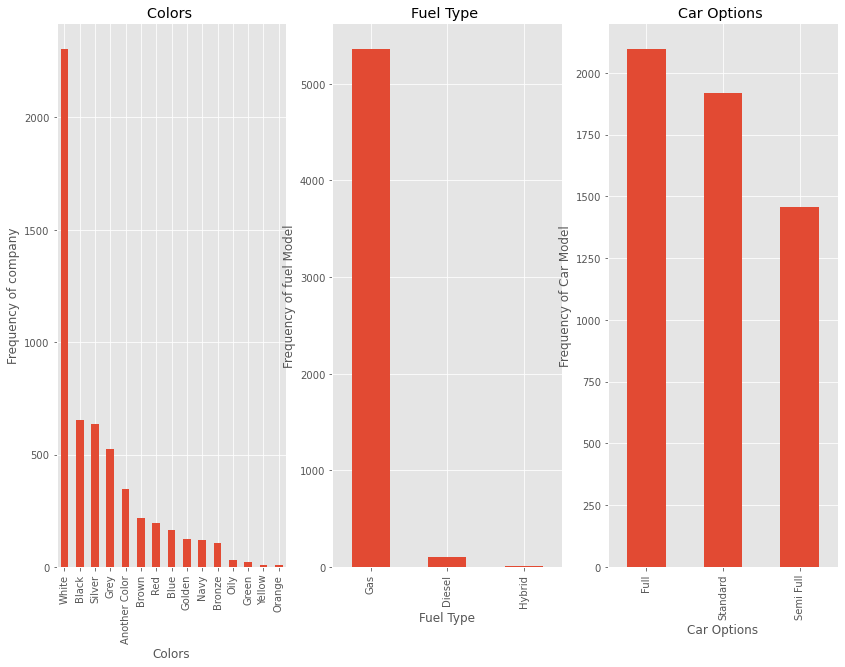

In [38]:
plt.figure(figsize=(14,10))

plt.subplot(1,3,1)
plt1 = Used_Cars.Color.value_counts().plot(kind='bar')
plt.title('Colors ')
plt1.set(xlabel = 'Colors', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = Used_Cars.Fuel_Type.value_counts().plot(kind='bar')
plt.title('Fuel Type ')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel Model')

plt.subplot(1,3,3)
plt1 = Used_Cars.Options.value_counts().plot(kind='bar')
plt.title('Car Options ')
plt1.set(xlabel = 'Car Options', ylabel='Frequency of Car Model')

plt.show()


## 2.12 Insight 12

These are three bra charts that show us:

- White is the most sold color

- Gas is more expensive than the others fuel Models.

- The Standard option has the highest amount of cars while the Semi Full is less.

# ---------------------------------------------------------------------------------------------------------



***
# 3. ML Regression Section 

## "Price"  Prediction 
***

## 3.1 Feature Engineering and Feature Selection

In [39]:
Used_Cars.head()

,Make,Car_Model,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
0,Chrysler,C300,2018,Saudi,Black,Full,5,Gas,Automatic,103000,Riyadh,114000.0
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1,Gas,Automatic,72418,Riyadh,27500.0
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1,Gas,Automatic,114154,Riyadh,43000.0
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2,Gas,Automatic,41912,Riyadh,59500.0
5,Honda,Accord,2018,Saudi,Navy,Full,1,Gas,Automatic,39000,Riyadh,72000.0


In [40]:
# Take only the significat variables
Used_Cars_Reg = Used_Cars[['Make','Car_Model','Year','Color','Options','Engine_Size','Gear_Type', 'Mileage','Region','Price']]
Categorical_Valiables = ['Make','Car_Model','Color','Options','Gear_Type','Region'] # Categorical Valiables

# Get the dummy variables for the categorical feature and store it in a new variable 'Dummies'
Dummies = pd.get_dummies(Used_Cars_Reg[Categorical_Valiables])
# Add the results to the original dataframe
Used_Cars_Reg = pd.concat([Used_Cars_Reg, Dummies], axis = 1)
# Drop the original Categorical Valiables as Dummies are already created
Used_Cars_Reg.drop(Categorical_Valiables, axis = 1, inplace = True)

Used_Cars_Reg.shape

(5469, 498)

In [41]:
Used_Cars_Reg.head()

,Year,Engine_Size,Mileage,Price,Make_Ashok,Make_Aston Martin,Make_Audi,Make_BMW,Make_BYD,Make_Bentley,...,Region_Najran,Region_Qassim,Region_Qurayyat,Region_Riyadh,Region_Sabya,Region_Sakaka,Region_Tabouk,Region_Taef,Region_Wadi Dawasir,Region_Yanbu
0,2018,5,103000,114000.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2019,1,72418,27500.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2019,1,114154,43000.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2019,2,41912,59500.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,2018,1,39000,72000.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [42]:
# The baseline of our model
Used_Cars_Reg["Price"].value_counts(normalize=True)

45000.0     0.025782
55000.0     0.023039
35000.0     0.022673
30000.0     0.021393
50000.0     0.020845
              ...   
123500.0    0.000183
124500.0    0.000183
54900.0     0.000183
132500.0    0.000183
95800.0     0.000183
Name: Price, Length: 459, dtype: float64

In [43]:
# Selecting the features and target variables

Target_var = "Price" 
Target = Used_Cars_Reg[Target_var]

Features = Used_Cars_Reg.drop(Target_var, axis=1).astype('int') 

## 3.2 Splitting The Dataset

In [44]:
# Assgin the feature set and the target for both the train and the test 
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.2, random_state=55)

print(X_train.shape)
print(X_test.shape)

(4375, 497)
(1094, 497)


In [46]:
# Instantiate Scaler Object
scaler = StandardScaler()

# Apply to X data --> only numeric columns 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3.3 Train Models

## 1st Regression Model 

### Decision Tree For Regression

In [47]:
reg_tree = DecisionTreeRegressor(random_state = 55, max_depth= 4, criterion= 'squared_error')
print('The fit for train dataset :', reg_tree.fit(X_train_scaled, y_train))

print('_________________________________________________________________________')

prediction_tree = reg_tree.predict(X_test_scaled)
print('The predictions for X_test :', prediction_tree)



The fit for train dataset : DecisionTreeRegressor(max_depth=4, random_state=55)
_________________________________________________________________________
The predictions for X_test : [22881.27090301 79423.76470588 65402.08088235 ... 79423.76470588
 79423.76470588 46702.3872679 ]


## 2nd Regression Model  

### Random Forest For Linear

In [48]:
reg_forest = RandomForestRegressor(n_estimators = 10, random_state = 55, criterion = 'squared_error')
print('The fit for train dataset :', reg_forest.fit(X_train_scaled, y_train))

print('_________________________________________________________________________')

prediction_forest = reg_forest.predict(X_test_scaled)
print('The predictions for X_test :', prediction_forest)


The fit for train dataset : RandomForestRegressor(n_estimators=10, random_state=55)
_________________________________________________________________________
The predictions for X_test : [ 18750.   52200.8  52750.  ...  48400.  132200.   31650. ]


## 3rd Regression Model  

### Regression using XGBoost

In [49]:
xgb_reg = xgb.XGBRegressor(objective = "reg:squarederror",
                           n_estimators = 75,
                           subsample = 0.75,
                           max_depth = 7)

print('The fit for train dataset :', xgb_reg.fit(X_train_scaled, y_train))

print('_________________________________________________________________________')

prediction_XGBoost = xgb_reg.predict(X_test_scaled)
print('The predictions :', prediction_XGBoost)


The fit for train dataset : XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=75, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
_________________________________________________________________________
The predictions : [ 25189.625  59773.812  43315.156 ...  54472.035 122435.79   18276.76 ]


## 3.4 Model Evaluation

### Regression Analysis Summary

In [50]:
# Function for evaluating regression models
def Compare_Regression(method, actual, preds,model):
    
    val_train = round(model.score(X_train_scaled, y_train),2)*100
    val_test = round(model.score(X_test_scaled, y_test),2)*100
    
    print(f'{method} Regression Model:')
    print('-------------------------------------------------')
    print('MAE:', metrics.mean_absolute_error(actual, preds))
    print('MSE:', metrics.mean_squared_error(actual, preds))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(actual, preds)))
    print(f'Training Accuracy: {val_train}%')
    print(f'Test Set Accuracy: {val_test}%')
    print('Score:', (r2_score(y_true=actual, y_pred=preds)*100),'\n\n ')
    

In [51]:
model_labels = ['Decision Tree', 'Random Forest', 'XGBoost']
model_pred = [prediction_tree, prediction_forest, prediction_XGBoost]
model_names = [reg_tree, reg_forest, xgb_reg]

for x in range(len(model_pred)):
    
    Compare_Regression(model_labels[x],y_test, model_pred[x],model_names[x] )

Decision Tree Regression Model:
-------------------------------------------------
MAE: 34200.19387371461
MSE: 3824579451.2106957
RMSE: 61843.18435535719
Training Accuracy: 52.0%
Test Set Accuracy: 33.0%
Score: 32.73894202582047 

 
Random Forest Regression Model:
-------------------------------------------------
MAE: 16195.750944546007
MSE: 1444354416.2200975
RMSE: 38004.66308520702
Training Accuracy: 96.0%
Test Set Accuracy: 75.0%
Score: 74.5988265209423 

 
XGBoost Regression Model:
-------------------------------------------------
MAE: 14693.252235203383
MSE: 862906244.272786
RMSE: 29375.265858759238
Training Accuracy: 97.0%
Test Set Accuracy: 85.0%
Score: 84.82447870080449 

 


## 3.5 Model Selection 

In [52]:
# The selection of the best model was done based on the high degree of the accuracy of the model compared to other models
# Subsequently, the best model was the third model which is "XGBoost model", 
# because it has an accuracy of training accuracy: 97.0% , and test set accuracy: 85.0%.

## 3.6 Hyperparameter Tuning ( GridSearchCV )

In [65]:
# Various hyper-parameters to tune
parameters = {'nthread':[4], 
              'learning_rate': [.03, 0.05, .07], 
              'max_depth': [5, 6, 7], 
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb_reg,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

In [66]:
xgb_grid.fit(X_train,y_train)
xgb_pred = xgb_grid.predict(X_test_scaled)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


In [68]:
print(f'XGBoost Regression Model:')
print('-------------------------------------------------')
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))
print('The Best Score:', (xgb_grid.best_score_)*100)
print('The Best Params:', (xgb_grid.best_params_))


XGBoost Regression Model:
-------------------------------------------------
RMSE: 79925.2969425307
The Best Score: 86.48789137775677
The Best Params: {'learning_rate': 0.07, 'max_depth': 7, 'n_estimators': 500, 'nthread': 4}


## 3.7 ML Pipeline For The Best Model

In [69]:
# Create a transformer for numeric columns
numeric_features = X_train.describe().columns 
numeric_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler())
    ]
)

In [70]:
# Create Transformer for categorical data
categorical_features = [col for col in X_train.columns if col not in X_train.describe().columns] # Return only categorical names
categorical_transformer = Pipeline(
    steps=[
        ('cat_imputer', SimpleImputer(strategy="most_frequent")),
        ('one_hot', OneHotEncoder(handle_unknown='ignore')) # Ignore unseen categorical in transform step not seen in fit_transform
    ]
)

In [71]:
# Create a preprocessor transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', xgb.XGBRegressor(objective = "reg:squarederror",
                           n_estimators = 75,
                           subsample = 0.75,
                           max_depth = 7))])

clf.fit(X_train, y_train)

print(f"model score: {clf.score(X_test, y_test)*100}")

model score: 84.82447870080449


# -----------------------------------------------------------------------------------------------------------------

***
# 4. ML Classification Section 

## "Options" Prediction
***

## 4.1 Feature Engineering and Feature Selection

In [18]:
# Take only the significat variables that will be affect 
Used_Cars_Class = Used_Cars[
    ['Make','Car_Model','Year','Color','Options','Engine_Size','Gear_Type', 'Mileage','Region','Price']]
 
Options_dict={'Standard':0 ,'Semi Full':1, 'Full':2}
Used_Cars_Class['Options'] = Used_Cars_Class['Options'].replace(Options_dict)

Categorical_Valiables = ['Make','Car_Model','Color','Gear_Type','Region'] # Categorical Valiables

# Get the dummy variables for the categorical feature and store it in a new variable 'dummies'
Dummies = pd.get_dummies(Used_Cars_Class[Categorical_Valiables])
# Add the results to the original dataframe
Used_Cars_Class = pd.concat([Used_Cars_Class, Dummies], axis = 1)
# Drop the original cat variables as dummies are already created
Used_Cars_Class.drop(Categorical_Valiables, axis = 1, inplace = True)

Used_Cars_Class.shape


/var/folders/kf/49p1gd_s7575f064qk45x2q40000gn/T/ipykernel_2421/3267799177.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Used_Cars_Class['Options'] = Used_Cars_Class['Options'].replace(Options_dict)


(8050, 542)

In [19]:
Used_Cars_Class= Used_Cars_Class.astype('int')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
Used_Cars_Class.head()

In [101]:
# The baseline of our model
Used_Cars["Options"].value_counts(normalize=True)

Full         0.383068
Standard     0.350887
Semi Full    0.266045
Name: Options, dtype: float64

In [20]:
# Establish features and target variables
Target_var = "Options" 

Target = Used_Cars_Class[Target_var]
Features = Used_Cars_Class.drop(Target_var, axis=1).astype('int') 


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

## 4.2 Splitting The Dataset

In [21]:
# Assgin the feature set and the target for both the train and the test 
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.2, random_state=55)

NameError: name 'Features' is not defined

In [22]:
# Instantiate Scaler Object
scaler = StandardScaler()

# Apply to X data --> only numeric columns 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

NameError: name 'X_train' is not defined

## 4.3 Train Models

## 1st Classification Model 

### Simple Classification Model

In [104]:
Classif_reg = LogisticRegression(random_state = 55)
print('The fit for train dataset :', Classif_reg.fit(X_train, y_train))

print('_________________________________________________________________________')

prediction1= Classif_reg.predict(X_test)
print('The predictions for X_test :', prediction1)

print('the Intercept Score :', Classif_reg.intercept_)
print('the Coef Score :', Classif_reg.coef_)


The fit for train dataset : LogisticRegression(random_state=55)
_________________________________________________________________________
The predictions for X_test : [0 0 0 ... 0 2 0]
the Intercept Score : [ 2.38442563e-07 -6.11604154e-08 -1.77282148e-07]
the Coef Score : [[ 4.84161660e-04 -4.78248201e-07 -1.53799702e-06 ... -4.87963282e-09
  -7.20509307e-10 -5.01079331e-09]
 [-1.22933894e-04  2.63789403e-07  4.90567905e-07 ...  5.74998422e-09
  -2.44583080e-09  4.85062084e-09]
 [-3.61227767e-04  2.14458798e-07  1.04742911e-06 ... -8.70351400e-10
   3.16634010e-09  1.60172473e-10]]


## 2nd Classification Model 

### Decision Tree Classifier

In [105]:
DecisionTree_reg = DecisionTreeClassifier(criterion = 'entropy', random_state = 55, max_depth=4)
print('The fit for train dataset :', DecisionTree_reg.fit(X_train, y_train))

print('_________________________________________________________________________')

prediction_tree = DecisionTree_reg.predict(X_test)
print('The predictions for X_test :', prediction_tree)


The fit for train dataset : DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=55)
_________________________________________________________________________
The predictions for X_test : [2 0 0 ... 2 1 0]


## 3rd Classification Model 

### Random Forest Model

In [106]:
RandomForest_reg = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 55)
print('The fit for train dataset :', RandomForest_reg.fit(X_train, y_train))

print('_________________________________________________________________________')

prediction_forest = RandomForest_reg.predict(X_test)
print('The predictions for X_test :', prediction_forest)

The fit for train dataset : RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=55)
_________________________________________________________________________
The predictions for X_test : [2 2 0 ... 0 1 0]


## 4th Classification Model 

### XGBoost Classification

In [107]:
Classif_XGBoost = XGBClassifier()
print('The fit for train dataset :', Classif_XGBoost.fit(X_train, y_train))

print('_________________________________________________________________________')

prediction_XGBoost= Classif_XGBoost.predict(X_test)
print('The predictions for X_test :', prediction_XGBoost)

The fit for train dataset : XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)
_________________________________________________________________________
The predictions for X_test : [2 2 0 ... 0 1 0]


## 4.4 Model Evaluation

In [108]:
# Function for comparing the Classification models
def Compare_Classification(method, actual, preds, model):
    
    val_train = round(model.score(X_train, y_train),2)*100
    val_test = round(model.score(X_test, actual),2)*100
    accuracyScore = (accuracy_score(actual, preds)*100)
    
    print(f'{method} Classification:')
    print('-------------------------------------------------')
    print('The mean absolute error :', mean_absolute_error(y_true=actual, y_pred=preds))
    print(f'Training Accuracy: {val_train}%')
    print(f'Test Set Accuracy: {val_test}%')
    print(f'Accuracy Score: {accuracyScore}%','\n\n ')
    


In [109]:
model_labels = ['Simple','Decision Tree', 'Random Forest','XGBoost']
model_pred = [prediction1, prediction_tree, prediction_forest, prediction_XGBoost]
model_names = [Classif_reg, DecisionTree_reg, RandomForest_reg , Classif_XGBoost]

for x in range(len(model_pred)):
    
    Compare_Classification(model_labels[x],y_test, model_pred[x],model_names[x] )

Simple Classification:
-------------------------------------------------
The mean absolute error : 0.7367458866544789
Training Accuracy: 51.0%
Test Set Accuracy: 49.0%
Accuracy Score: 49.45155393053016% 

 
Decision Tree Classification:
-------------------------------------------------
The mean absolute error : 0.6645338208409507
Training Accuracy: 55.00000000000001%
Test Set Accuracy: 53.0%
Accuracy Score: 52.833638025594155% 

 
Random Forest Classification:
-------------------------------------------------
The mean absolute error : 0.5255941499085923
Training Accuracy: 98.0%
Test Set Accuracy: 59.0%
Accuracy Score: 58.59232175502742% 

 
XGBoost Classification:
-------------------------------------------------
The mean absolute error : 0.5182815356489945
Training Accuracy: 84.0%
Test Set Accuracy: 59.0%
Accuracy Score: 59.04936014625228% 

 


## 4.5 Model  Evaluation

### 1st Model  Evaluation

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


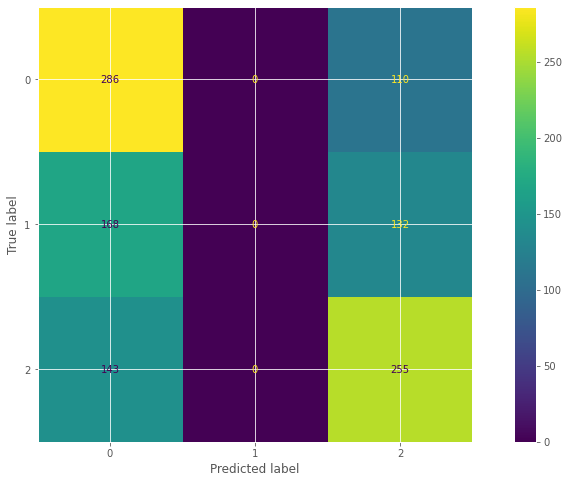

In [110]:
# Making a confusion matrix for more detail
plot_confusion_matrix(Classif_reg, X_test, y_test);

In [111]:
# Printing the classification report
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.48      0.72      0.58       396
           1       0.00      0.00      0.00       300
           2       0.51      0.64      0.57       398

    accuracy                           0.49      1094
   macro avg       0.33      0.45      0.38      1094
weighted avg       0.36      0.49      0.42      1094



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 2nd Model  Evaluation

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


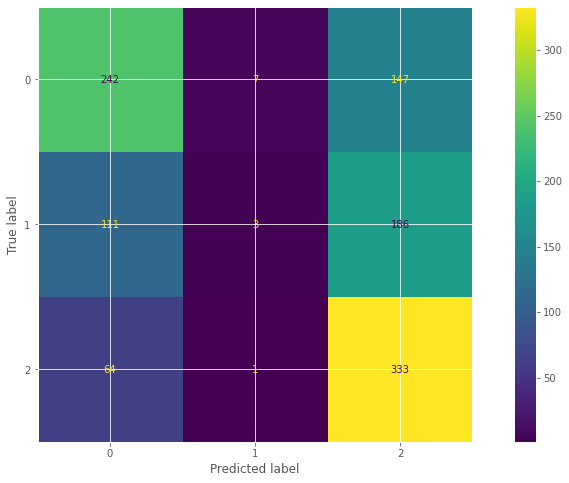

In [112]:
# Making a confusion matrix for more detail
plot_confusion_matrix(DecisionTree_reg, X_test, y_test);

In [113]:
# Printing the classification report
print(classification_report(y_test, prediction_tree))

              precision    recall  f1-score   support

           0       0.58      0.61      0.60       396
           1       0.27      0.01      0.02       300
           2       0.50      0.84      0.63       398

    accuracy                           0.53      1094
   macro avg       0.45      0.49      0.41      1094
weighted avg       0.47      0.53      0.45      1094



### 3rd Model  Evaluation

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


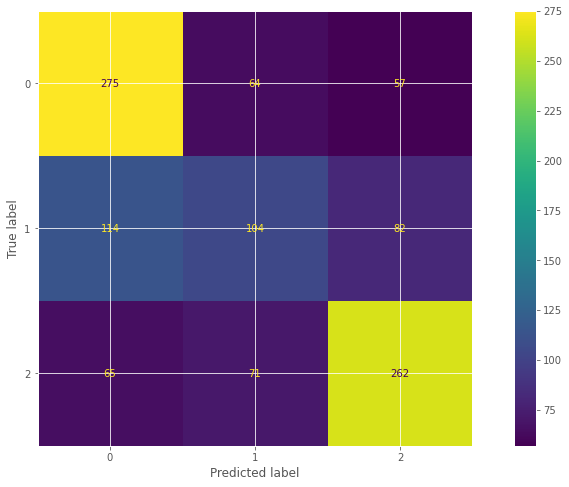

In [114]:
# Making a confusion matrix for more detail
plot_confusion_matrix(RandomForest_reg, X_test, y_test);

In [115]:
# Printing the classification report
print(classification_report(y_test, prediction_forest))

              precision    recall  f1-score   support

           0       0.61      0.69      0.65       396
           1       0.44      0.35      0.39       300
           2       0.65      0.66      0.66       398

    accuracy                           0.59      1094
   macro avg       0.56      0.57      0.56      1094
weighted avg       0.58      0.59      0.58      1094



### 4th Model Evaluation

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


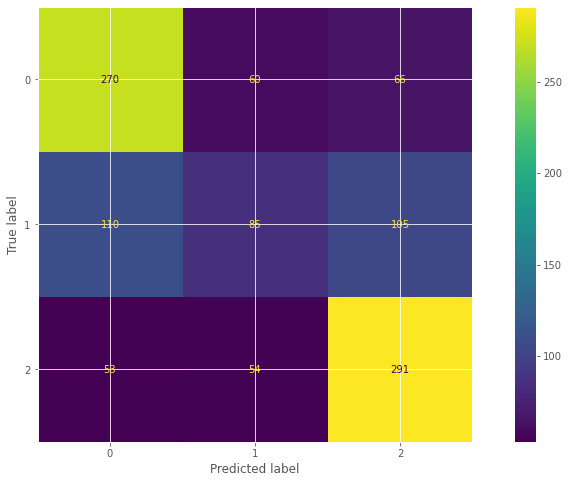

In [116]:
plot_confusion_matrix(Classif_XGBoost, X=X_test, y_true=y_test)

In [117]:
print(classification_report(y_test, prediction_XGBoost))

              precision    recall  f1-score   support

           0       0.62      0.68      0.65       396
           1       0.43      0.28      0.34       300
           2       0.63      0.73      0.68       398

    accuracy                           0.59      1094
   macro avg       0.56      0.57      0.56      1094
weighted avg       0.57      0.59      0.58      1094



## 4.6 Model Selection 

In [118]:
# The selection of the best model was done based on the high degree of accuracy of the model compared to other models
# Subsequently, the best model was the fivth model which "Random Forest Classifier", 
# because it has a training accuracy Score: 98.0%.

## 4.7  Hyperparameter Tuning ( GridSearchCV )

In [120]:
# Create param grid to hyper parameter tune the model
param_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median", "most_frequent"], # adjust the strategy for imputation
    "classifier__C": [0.1, 0.3, 0.5, 0.6, 0.8, 1.0],# Adjust regularization strength
     "preprocessor__num__scaler__with_mean": [True, False]
}
grid = GridSearchCV(Classif_XGBoost, # Model
                    param_grid=param_grid, # Parameters to tune
                    cv=5, # Cross Validation
                    verbose=1, # Shows output while training 
                    n_jobs=-1, # How many core to use on your computer (-1 means use all cores)
                    scoring="accuracy"
                   )


In [121]:
grid.fit(X_train,y_train)
preds = grid.best_estimator_.predict(X_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[22:16:13] WARNING: D:\bld\xgboost-split_1660208973102\work\src\learner.cc:627: 
Parameters: { "classifier__C", "preprocessor__num__imputer__strategy", "preprocessor__num__scaler__with_mean" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [122]:
Grid_Used_Cars = pd.DataFrame(grid.cv_results_)
 
parameters = ['param_classifier__C', 'param_preprocessor__num__imputer__strategy','param_preprocessor__num__scaler__with_mean' ,'mean_test_score', 'rank_test_score']

Grid_Used_Cars[parameters].sort_values(by = ['rank_test_score'])

,param_classifier__C,param_preprocessor__num__imputer__strategy,param_preprocessor__num__scaler__with_mean,mean_test_score,rank_test_score
0,0.1,mean,True,0.606171,1
20,0.6,median,True,0.606171,1
21,0.6,median,False,0.606171,1
22,0.6,most_frequent,True,0.606171,1
23,0.6,most_frequent,False,0.606171,1
24,0.8,mean,True,0.606171,1
25,0.8,mean,False,0.606171,1
19,0.6,mean,False,0.606171,1
26,0.8,median,True,0.606171,1
28,0.8,most_frequent,True,0.606171,1


In [123]:
print(f'XGBoost Classification Model:')
print('-------------------------------------------------')
print('The Best Score:', (grid.best_score_)*100)
print('The Best Params:', (grid.best_params_))

XGBoost Classification Model:
-------------------------------------------------
The Best Score: 60.61714285714286
The Best Params: {'classifier__C': 0.1, 'preprocessor__num__imputer__strategy': 'mean', 'preprocessor__num__scaler__with_mean': True}


## 4.8 ML Pipeline for Best Model

In [124]:
# Create a transformer for numeric columns
numeric_features = X_train.describe().columns 
numeric_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler())
    ]
)

In [125]:
# Create Transformer for categorical data
categorical_features = [col for col in X_train.columns if col not in X_train.describe().columns] # Return only categorical names
categorical_transformer = Pipeline(
    steps=[
        ('cat_imputer', SimpleImputer(strategy="most_frequent")),
        ('one_hot', OneHotEncoder(handle_unknown='ignore')) # Ignore unseen categorical in transform step not seen in fit_transform
    ]
)

In [126]:
# Create a preprocessor transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', XGBClassifier())])

clf.fit(X_train, y_train)

print(f"model score: {clf.score(X_test, y_test)*100}")

model score: 59.14076782449725


# -----------------------------------------------------------------------------------------------------------------